In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 256 files belonging to 3 classes.
Using 205 files for training.
Found 256 files belonging to 3 classes.
Using 51 files for validation.
['green', 'overripe', 'ripe']
94781440/94765736 [==============================] - 1s 0us/step


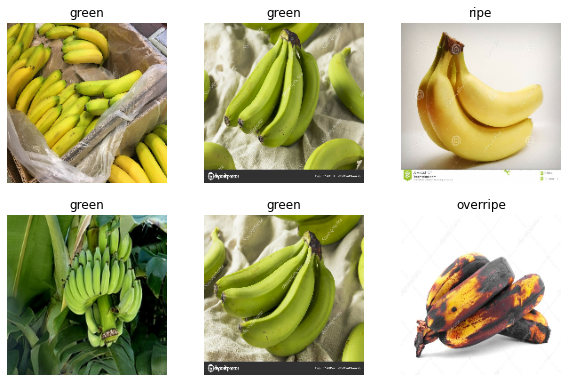

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dense 
from keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os


from google.colab import drive
drive.mount('/content/drive')


images_dir = "./drive/MyDrive/dataset/banana_dataset"

img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names=train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)



In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:

resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
7/7 [==============================] - 39s 5s/step - loss: 3.0948 - accuracy: 0.5122 - val_loss: 1.4701 - val_accuracy: 0.6275
Epoch 2/10
7/7 [==============================] - 28s 4s/step - loss: 0.8010 - accuracy: 0.8098 - val_loss: 0.7055 - val_accuracy: 0.8235
Epoch 3/10
7/7 [==============================] - 28s 4s/step - loss: 0.3943 - accuracy: 0.8341 - val_loss: 0.4286 - val_accuracy: 0.8235
Epoch 4/10
7/7 [==============================] - 28s 4s/step - loss: 0.1493 - accuracy: 0.9512 - val_loss: 0.4345 - val_accuracy: 0.8039
Epoch 5/10
7/7 [==============================] - 28s 4s/step - loss: 0.1031 - accuracy: 0.9707 - val_loss: 0.3797 - val_accuracy: 0.8235
Epoch 6/10
7/7 [==============================] - 28s 4s/step - loss: 0.0554 - accuracy: 0.9902 - val_loss: 0.3501 - val_accuracy: 0.8235
Epoch 7/10
7/7 [==============================] - 28s 4s/step - loss: 0.0391 - accuracy: 0.9951 - val_loss: 0.3521 - val_accuracy: 0.8627
Epoch 8/10
7/7 [==================

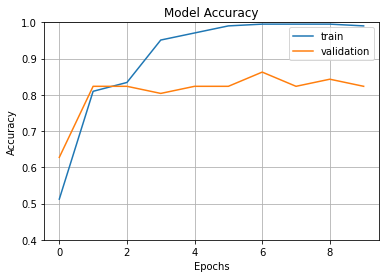

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()